<a href="https://colab.research.google.com/github/alipourmotlagh/DeepLearning/blob/main/IntroDeeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import seaborn as sns
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:


# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time_steps = np.array([-10.        ,  -9.989995  ,  -9.97998999,  -9.96998499,
        -9.95997999,  -9.94997499,  -9.93996998,  -9.92996498,
        -9.91995998,  -9.90995498,  -9.89994997,  -9.88994497,
        -9.87993997,  -9.86993497,  -9.85992996,  -9.84992496,
        -9.83991996,  -9.82991496,  -9.81990995,  -9.80990495,
        -9.79989995,  -9.78989495,  -9.77988994,  -9.76988494,
        -9.75987994,  -9.74987494,  -9.73986993,  -9.72986493,
        -9.71985993,  -9.70985493,  -9.69984992,  -9.68984492,
        -9.67983992,  -9.66983492,  -9.65982991,  -9.64982491,
        -9.63981991,  -9.62981491,  -9.6198099 ,  -9.6098049 ,
        -9.5997999 ,  -9.5897949 ,  -9.57978989,  -9.56978489,
        -9.55977989,  -9.54977489,  -9.53976988,  -9.52976488,
        -9.51975988,  -9.50975488,  -9.49974987,  -9.48974487,
        -9.47973987,  -9.46973487,  -9.45972986,  -9.44972486,
        -9.43971986,  -9.42971486,  -9.41970985,  -9.40970485,
        -9.39969985,  -9.38969485,  -9.37968984,  -9.36968484,
        -9.35967984,  -9.34967484,  -9.33966983,  -9.32966483,
        -9.31965983,  -9.30965483,  -9.29964982,  -9.28964482,
        -9.27963982,  -9.26963482,  -9.25962981,  -9.24962481,
        -9.23961981,  -9.22961481,  -9.2196098 ,  -9.2096048 ,
        -9.1995998 ,  -9.1895948 ,  -9.17958979,  -9.16958479,
        -9.15957979,  -9.14957479,  -9.13956978,  -9.12956478,
        -9.11955978,  -9.10955478,  -9.09954977,  -9.08954477,
        -9.07953977,  -9.06953477,  -9.05952976,  -9.04952476,
        -9.03951976,  -9.02951476,  -9.01950975,  -9.00950475,
       -8.99949975, -8.98949475, -8.97948974, -8.96948474, -8.95947974,
       -8.94947474, -8.93946973, -8.92946473, -8.91945973, -8.90945473,
       -8.89944972, -8.88944472, -8.87943972, -8.86943472, -8.85942971,
       -8.84942471, -8.83941971, -8.82941471, -8.8194097 , -8.8094047 ,
       -8.7993997 , -8.7893947 , -8.77938969, -8.76938469, -8.75937969,
       -8.74937469, -8.73936968, -8.72936468, -8.71935968, -8.70935468,
       -8.69934967, -8.68934467, -8.67933967, -8.66933467, -8.65932966,
       -8.64932466, -8.63931966, -8.62931466, -8.61930965, -8.60930465,
       -8.59929965, -8.58929465, -8.57928964, -8.56928464, -8.55927964,
       -8.54927464, -8.53926963, -8.52926463, -8.51925963, -8.50925463,
       -8.49924962, -8.48924462, -8.47923962, -8.46923462, -8.45922961,
       -8.44922461, -8.43921961, -8.42921461, -8.4192096 , -8.4092046 ,
       -8.3991996 , -8.3891946 , -8.37918959, -8.36918459, -8.35917959,
       -8.34917459, -8.33916958, -8.32916458, -8.31915958, -8.30915458,
       -8.29914957, -8.28914457, -8.27913957, -8.26913457, -8.25912956,
       -8.24912456, -8.23911956, -8.22911456, -8.21910955, -8.20910455,
       -8.19909955, -8.18909455, -8.17908954, -8.16908454, -8.15907954,
       -8.14907454, -8.13906953, -8.12906453, -8.11905953, -8.10905453,
       -8.09904952, -8.08904452, -8.07903952, -8.06903452, -8.05902951,
       -8.04902451, -8.03901951, -8.02901451, -8.0190095 , -8.0090045 ,
       -7.9989995 , -7.9889945 , -7.97898949, -7.96898449, -7.95897949,
       -7.94897449, -7.93896948, -7.92896448, -7.91895948, -7.90895448,
       -7.89894947, -7.88894447, -7.87893947, -7.86893447, -7.85892946,
       -7.84892446, -7.83891946, -7.82891446, -7.81890945, -7.80890445,
       -7.79889945, -7.78889445, -7.77888944, -7.76888444, -7.75887944,
       -7.74887444, -7.73886943, -7.72886443, -7.71885943, -7.70885443,
       -7.69884942, -7.68884442, -7.67883942, -7.66883442, -7.65882941,
       -7.64882441, -7.63881941, -7.62881441, -7.6188094 , -7.6088044 ,
       -7.5987994 , -7.5887944 , -7.57878939, -7.56878439, -7.55877939,
       -7.54877439, -7.53876938, -7.52876438, -7.51875938, -7.50875438,
       -7.49874937, -7.48874437, -7.47873937, -7.46873437, -7.45872936,
       -7.44872436, -7.43871936, -7.42871436, -7.41870935, -7.40870435,
       -7.39869935, -7.38869435, -7.37868934, -7.36868434, -7.35867934,
       -7.34867434, -7.33866933, -7.32866433, -7.31865933, -7.30865433,
       -7.29864932, -7.28864432, -7.27863932, -7.26863432, -7.25862931,
       -7.24862431, -7.23861931, -7.22861431, -7.2186093 , -7.2086043 ,
       -7.1985993 , -7.1885943 , -7.17858929, -7.16858429, -7.15857929,
       -7.14857429, -7.13856928, -7.12856428, -7.11855928, -7.10855428,
       -7.09854927, -7.08854427, -7.07853927, -7.06853427, -7.05852926,
       -7.04852426, -7.03851926, -7.02851426, -7.01850925, -7.00850425,
       -6.99849925, -6.98849425, -6.97848924, -6.96848424, -6.95847924,
       -6.94847424, -6.93846923, -6.92846423, -6.91845923, -6.90845423,
       -6.89844922, -6.88844422, -6.87843922, -6.86843422, -6.85842921,
       -6.84842421, -6.83841921, -6.82841421, -6.8184092 , -6.8084042 ,
       -6.7983992 , -6.7883942 , -6.77838919, -6.76838419, -6.75837919,
       -6.74837419, -6.73836918, -6.72836418, -6.71835918, -6.70835418,
       -6.69834917, -6.68834417, -6.67833917, -6.66833417, -6.65832916,
       -6.64832416, -6.63831916, -6.62831416, -6.61830915, -6.60830415,
       -6.59829915, -6.58829415, -6.57828914, -6.56828414, -6.55827914,
       -6.54827414, -6.53826913, -6.52826413, -6.51825913, -6.50825413,
       -6.49824912, -6.48824412, -6.47823912, -6.46823412, -6.45822911,
       -6.44822411, -6.43821911, -6.42821411, -6.4182091 , -6.4082041 ,
       -6.3981991 , -6.3881941 , -6.37818909, -6.36818409, -6.35817909,
       -6.34817409, -6.33816908, -6.32816408, -6.31815908, -6.30815408,
       -6.29814907, -6.28814407, -6.27813907, -6.26813407, -6.25812906,
       -6.24812406, -6.23811906, -6.22811406, -6.21810905, -6.20810405,
       -6.19809905, -6.18809405, -6.17808904, -6.16808404, -6.15807904,
       -6.14807404, -6.13806903, -6.12806403, -6.11805903, -6.10805403,
       -6.09804902, -6.08804402, -6.07803902, -6.06803402, -6.05802901,
       -6.04802401, -6.03801901, -6.02801401, -6.018009  , -6.008004  ,
       -5.997999  , -5.987994  , -5.97798899, -5.96798399, -5.95797899,
       -5.94797399, -5.93796898, -5.92796398, -5.91795898, -5.90795398,
       -5.89794897, -5.88794397, -5.87793897, -5.86793397, -5.85792896,
       -5.84792396, -5.83791896, -5.82791396, -5.81790895, -5.80790395,
       -5.79789895, -5.78789395, -5.77788894, -5.76788394, -5.75787894,
       -5.74787394, -5.73786893, -5.72786393, -5.71785893, -5.70785393,
       -5.69784892, -5.68784392, -5.67783892, -5.66783392, -5.65782891,
       -5.64782391, -5.63781891, -5.62781391, -5.6178089 , -5.6078039 ,
       -5.5977989 , -5.5877939 , -5.57778889, -5.56778389, -5.55777889,
       -5.54777389, -5.53776888, -5.52776388, -5.51775888, -5.50775388,
       -5.49774887, -5.48774387, -5.47773887, -5.46773387, -5.45772886,
       -5.44772386, -5.43771886, -5.42771386, -5.41770885, -5.40770385,
       -5.39769885, -5.38769385, -5.37768884, -5.36768384, -5.35767884,
       -5.34767384, -5.33766883, -5.32766383, -5.31765883, -5.30765383,
       -5.29764882, -5.28764382, -5.27763882, -5.26763382, -5.25762881,
       -5.24762381, -5.23761881, -5.22761381, -5.2176088 , -5.2076038 ,
       -5.1975988 , -5.1875938 , -5.17758879, -5.16758379, -5.15757879,
       -5.14757379, -5.13756878, -5.12756378, -5.11755878, -5.10755378,
       -5.09754877, -5.08754377, -5.07753877, -5.06753377, -5.05752876,
       -5.04752376, -5.03751876, -5.02751376, -5.01750875, -5.00750375,
       -4.99749875, -4.98749375, -4.97748874, -4.96748374, -4.95747874,
       -4.94747374, -4.93746873, -4.92746373, -4.91745873, -4.90745373,
       -4.89744872, -4.88744372, -4.87743872, -4.86743372, -4.85742871,
       -4.84742371, -4.83741871, -4.82741371, -4.8174087 , -4.8074037 ,
       -4.7973987 , -4.7873937 , -4.77738869, -4.76738369, -4.75737869,
       -4.74737369, -4.73736868, -4.72736368, -4.71735868, -4.70735368,
       -4.69734867, -4.68734367, -4.67733867, -4.66733367, -4.65732866,
       -4.64732366, -4.63731866, -4.62731366, -4.61730865, -4.60730365,
       -4.59729865, -4.58729365, -4.57728864, -4.56728364, -4.55727864,
       -4.54727364, -4.53726863, -4.52726363, -4.51725863, -4.50725363,
       -4.49724862, -4.48724362, -4.47723862, -4.46723362, -4.45722861,
       -4.44722361, -4.43721861, -4.42721361, -4.4172086 , -4.4072036 ,
       -4.3971986 , -4.3871936 , -4.37718859, -4.36718359, -4.35717859,
       -4.34717359, -4.33716858, -4.32716358, -4.31715858, -4.30715358,
       -4.29714857, -4.28714357, -4.27713857, -4.26713357, -4.25712856,
       -4.24712356, -4.23711856, -4.22711356, -4.21710855, -4.20710355,
       -4.19709855, -4.18709355, -4.17708854, -4.16708354, -4.15707854,
       -4.14707354, -4.13706853, -4.12706353, -4.11705853, -4.10705353,
       -4.09704852, -4.08704352, -4.07703852, -4.06703352, -4.05702851,
       -4.04702351, -4.03701851, -4.02701351, -4.0170085 , -4.0070035 ,
       -3.9969985 , -3.9869935 , -3.97698849, -3.96698349, -3.95697849,
       -3.94697349, -3.93696848, -3.92696348, -3.91695848, -3.90695348,
       -3.89694847, -3.88694347, -3.87693847, -3.86693347, -3.85692846,
       -3.84692346, -3.83691846, -3.82691346, -3.81690845, -3.80690345,
       -3.79689845, -3.78689345, -3.77688844, -3.76688344, -3.75687844,
       -3.74687344, -3.73686843, -3.72686343, -3.71685843, -3.70685343,
       -3.69684842, -3.68684342, -3.67683842, -3.66683342, -3.65682841,
       -3.64682341, -3.63681841, -3.62681341, -3.6168084 , -3.6068034 ,
       -3.5967984 , -3.5867934 , -3.57678839, -3.56678339, -3.55677839,
       -3.54677339, -3.53676838, -3.52676338, -3.51675838, -3.50675338,
       -3.49674837, -3.48674337, -3.47673837, -3.46673337, -3.45672836,
       -3.44672336, -3.43671836, -3.42671336, -3.41670835, -3.40670335,
       -3.39669835, -3.38669335, -3.37668834, -3.36668334, -3.35667834,
       -3.34667334, -3.33666833, -3.32666333, -3.31665833, -3.30665333,
       -3.29664832, -3.28664332, -3.27663832, -3.26663332, -3.25662831,
       -3.24662331, -3.23661831, -3.22661331, -3.2166083 , -3.2066033 ,
       -3.1965983 , -3.1865933 , -3.17658829, -3.16658329, -3.15657829,
       -3.14657329, -3.13656828, -3.12656328, -3.11655828, -3.10655328,
       -3.09654827, -3.08654327, -3.07653827, -3.06653327, -3.05652826,
       -3.04652326, -3.03651826, -3.02651326, -3.01650825, -3.00650325,
       -2.99649825, -2.98649325, -2.97648824, -2.96648324, -2.95647824,
       -2.94647324, -2.93646823, -2.92646323, -2.91645823, -2.90645323,
       -2.89644822, -2.88644322, -2.87643822, -2.86643322, -2.85642821,
       -2.84642321, -2.83641821, -2.82641321, -2.8164082 , -2.8064032 ,
       -2.7963982 , -2.7863932 , -2.77638819, -2.76638319, -2.75637819,
       -2.74637319, -2.73636818, -2.72636318, -2.71635818, -2.70635318,
       -2.69634817, -2.68634317, -2.67633817, -2.66633317, -2.65632816,
       -2.64632316, -2.63631816, -2.62631316, -2.61630815, -2.60630315,
       -2.59629815, -2.58629315, -2.57628814, -2.56628314, -2.55627814,
       -2.54627314, -2.53626813, -2.52626313, -2.51625813, -2.50625313,
       -2.49624812, -2.48624312, -2.47623812, -2.46623312, -2.45622811,
       -2.44622311, -2.43621811, -2.42621311, -2.4162081 , -2.4062031 ,
       -2.3961981 , -2.3861931 , -2.37618809, -2.36618309, -2.35617809,
       -2.34617309, -2.33616808, -2.32616308, -2.31615808, -2.30615308,
       -2.29614807, -2.28614307, -2.27613807, -2.26613307, -2.25612806,
       -2.24612306, -2.23611806, -2.22611306, -2.21610805, -2.20610305,
       -2.19609805, -2.18609305, -2.17608804, -2.16608304, -2.15607804,
       -2.14607304, -2.13606803, -2.12606303, -2.11605803, -2.10605303,
       -2.09604802, -2.08604302, -2.07603802, -2.06603302, -2.05602801,
       -2.04602301, -2.03601801, -2.02601301, -2.016008  , -2.006003  ,
       -1.995998  , -1.985993  , -1.97598799, -1.96598299, -1.95597799,
       -1.94597299, -1.93596798, -1.92596298, -1.91595798, -1.90595298,
       -1.89594797, -1.88594297, -1.87593797, -1.86593297, -1.85592796,
       -1.84592296, -1.83591796, -1.82591296, -1.81590795, -1.80590295,
       -1.79589795, -1.78589295, -1.77588794, -1.76588294, -1.75587794,
       -1.74587294, -1.73586793, -1.72586293, -1.71585793, -1.70585293,
       -1.69584792, -1.68584292, -1.67583792, -1.66583292, -1.65582791,
       -1.64582291, -1.63581791, -1.62581291, -1.6158079 , -1.6058029 ,
       -1.5957979 , -1.5857929 , -1.57578789, -1.56578289, -1.55577789,
       -1.54577289, -1.53576788, -1.52576288, -1.51575788, -1.50575288,
       -1.49574787, -1.48574287, -1.47573787, -1.46573287, -1.45572786,
       -1.44572286, -1.43571786, -1.42571286, -1.41570785, -1.40570285,
       -1.39569785, -1.38569285, -1.37568784, -1.36568284, -1.35567784,
       -1.34567284, -1.33566783, -1.32566283, -1.31565783, -1.30565283,
       -1.29564782, -1.28564282, -1.27563782, -1.26563282, -1.25562781,
       -1.24562281, -1.23561781, -1.22561281, -1.2156078 , -1.2056028 ,
       -1.1955978 , -1.1855928 , -1.17558779, -1.16558279, -1.15557779,
       -1.14557279, -1.13556778, -1.12556278, -1.11555778, -1.10555278,
       -1.09554777, -1.08554277, -1.07553777, -1.06553277, -1.05552776,
       -1.04552276, -1.03551776, -1.02551276, -1.01550775, -1.00550275,
       -0.99549775, -0.98549275, -0.97548774, -0.96548274, -0.95547774,
       -0.94547274, -0.93546773, -0.92546273, -0.91545773, -0.90545273,
       -0.89544772, -0.88544272, -0.87543772, -0.86543272, -0.85542771,
       -0.84542271, -0.83541771, -0.82541271, -0.8154077 , -0.8054027 ,
       -0.7953977 , -0.7853927 , -0.77538769, -0.76538269, -0.75537769,
       -0.74537269, -0.73536768, -0.72536268, -0.71535768, -0.70535268,
       -0.69534767, -0.68534267, -0.67533767, -0.66533267, -0.65532766,
       -0.64532266, -0.63531766, -0.62531266, -0.61530765, -0.60530265,
       -0.59529765, -0.58529265, -0.57528764, -0.56528264, -0.55527764,
       -0.54527264, -0.53526763, -0.52526263, -0.51525763, -0.50525263,
       -0.49524762, -0.48524262, -0.47523762, -0.46523262, -0.45522761,
       -0.44522261, -0.43521761, -0.42521261, -0.4152076 , -0.4052026 ,
       -0.3951976 , -0.3851926 , -0.37518759, -0.36518259, -0.35517759,
       -0.34517259, -0.33516758, -0.32516258, -0.31515758, -0.30515258,
       -0.29514757, -0.28514257, -0.27513757, -0.26513257, -0.25512756,
       -0.24512256, -0.23511756, -0.22511256, -0.21510755, -0.20510255,
       -0.19509755, -0.18509255, -0.17508754, -0.16508254, -0.15507754,
       -0.14507254, -0.13506753, -0.12506253, -0.11505753, -0.10505253,
       -0.09504752, -0.08504252, -0.07503752, -0.06503252, -0.05502751,
       -0.04502251, -0.03501751, -0.02501251, -0.0150075 , -0.0050025 ,
       5.00250125e-03, 1.50075038e-02, 2.50125063e-02, 3.50175088e-02,
       4.50225113e-02, 5.50275138e-02, 6.50325163e-02, 7.50375188e-02,
       8.50425213e-02, 9.50475238e-02, 1.05052526e-01, 1.15057529e-01,
       1.25062531e-01, 1.35067534e-01, 1.45072536e-01, 1.55077539e-01,
       1.65082541e-01, 1.75087544e-01, 1.85092546e-01, 1.95097549e-01,
       2.05102551e-01, 2.15107554e-01, 2.25112556e-01, 2.35117559e-01,
       2.45122561e-01, 2.55127564e-01, 2.65132566e-01, 2.75137569e-01,
       2.85142571e-01, 2.95147574e-01, 3.05152576e-01, 3.15157579e-01,
       3.25162581e-01, 3.35167584e-01, 3.45172586e-01, 3.55177589e-01,
       3.65182591e-01, 3.75187594e-01, 3.85192596e-01, 3.95197599e-01,
       4.05202601e-01, 4.15207604e-01, 4.25212606e-01, 4.35217609e-01,
       4.45222611e-01, 4.55227614e-01, 4.65232616e-01, 4.75237619e-01,
       4.85242621e-01, 4.95247624e-01, 5.05252626e-01, 5.15257629e-01,
       5.25262631e-01, 5.35267634e-01, 5.45272636e-01, 5.55277639e-01,
       5.65282641e-01, 5.75287644e-01, 5.85292646e-01, 5.95297649e-01,
       6.05302651e-01, 6.15307654e-01, 6.25312656e-01, 6.35317659e-01,
       6.45322661e-01, 6.55327664e-01, 6.65332666e-01, 6.75337669e-01,
       6.85342671e-01, 6.95347674e-01, 7.05352676e-01, 7.15357679e-01,
       7.25362681e-01, 7.35367684e-01, 7.45372686e-01, 7.55377689e-01,
       7.65382691e-01, 7.75387694e-01, 7.85392696e-01, 7.95397699e-01,
       8.05402701e-01, 8.15407704e-01, 8.25412706e-01, 8.35417709e-01,
       8.45422711e-01, 8.55427714e-01, 8.65432716e-01, 8.75437719e-01,
       8.85442721e-01, 8.95447724e-01, 9.05452726e-01, 9.15457729e-01,
       9.25462731e-01, 9.35467734e-01, 9.45472736e-01, 9.55477739e-01,
       9.65482741e-01, 9.75487744e-01, 9.85492746e-01, 9.95497749e-01,
       1.00550275e+00, 1.01550775e+00, 1.02551276e+00, 1.03551776e+00,
       1.04552276e+00, 1.05552776e+00, 1.06553277e+00, 1.07553777e+00,
       1.08554277e+00, 1.09554777e+00, 1.10555278e+00, 1.11555778e+00,
       1.12556278e+00, 1.13556778e+00, 1.14557279e+00, 1.15557779e+00,
       1.16558279e+00, 1.17558779e+00, 1.18559280e+00, 1.19559780e+00,
       1.20560280e+00, 1.21560780e+00, 1.22561281e+00, 1.23561781e+00,
       1.24562281e+00, 1.25562781e+00, 1.26563282e+00, 1.27563782e+00,
       1.28564282e+00, 1.29564782e+00, 1.30565283e+00, 1.31565783e+00,
       1.32566283e+00, 1.33566783e+00, 1.34567284e+00, 1.35567784e+00,
       1.36568284e+00, 1.37568784e+00, 1.38569285e+00, 1.39569785e+00,
       1.40570285e+00, 1.41570785e+00, 1.42571286e+00, 1.43571786e+00,
       1.44572286e+00, 1.45572786e+00, 1.46573287e+00, 1.47573787e+00,
       1.48574287e+00, 1.49574787e+00, 1.50575288e+00, 1.51575788e+00,
       1.52576288e+00, 1.53576788e+00, 1.54577289e+00, 1.55577789e+00,
       1.56578289e+00, 1.57578789e+00, 1.58579290e+00, 1.59579790e+00,
       1.60580290e+00, 1.61580790e+00, 1.62581291e+00, 1.63581791e+00,
       1.64582291e+00, 1.65582791e+00, 1.66583292e+00, 1.67583792e+00,
       1.68584292e+00, 1.69584792e+00, 1.70585293e+00, 1.71585793e+00,
       1.72586293e+00, 1.73586793e+00, 1.74587294e+00, 1.75587794e+00,
       1.76588294e+00, 1.77588794e+00, 1.78589295e+00, 1.79589795e+00,
       1.80590295e+00, 1.81590795e+00, 1.82591296e+00, 1.83591796e+00,
       1.84592296e+00, 1.85592796e+00, 1.86593297e+00, 1.87593797e+00,
       1.88594297e+00, 1.89594797e+00, 1.90595298e+00, 1.91595798e+00,
       1.92596298e+00, 1.93596798e+00, 1.94597299e+00, 1.95597799e+00,
       1.96598299e+00, 1.97598799e+00, 1.98599300e+00, 1.99599800e+00,
       2.00600300e+00, 2.01600800e+00, 2.02601301e+00, 2.03601801e+00,
       2.04602301e+00, 2.05602801e+00, 2.06603302e+00, 2.07603802e+00,
       2.08604302e+00, 2.09604802e+00, 2.10605303e+00, 2.11605803e+00,
       2.12606303e+00, 2.13606803e+00, 2.14607304e+00, 2.15607804e+00,
       2.16608304e+00, 2.17608804e+00, 2.18609305e+00, 2.19609805e+00,
       2.20610305e+00, 2.21610805e+00, 2.22611306e+00, 2.23611806e+00,
       2.24612306e+00, 2.25612806e+00, 2.26613307e+00, 2.27613807e+00,
       2.28614307e+00, 2.29614807e+00, 2.30615308e+00, 2.31615808e+00,
       2.32616308e+00, 2.33616808e+00, 2.34617309e+00, 2.35617809e+00,
       2.36618309e+00, 2.37618809e+00, 2.38619310e+00, 2.39619810e+00,
       2.40620310e+00, 2.41620810e+00, 2.42621311e+00, 2.43621811e+00,
       2.44622311e+00, 2.45622811e+00, 2.46623312e+00, 2.47623812e+00,
       2.48624312e+00, 2.49624812e+00, 2.50625313e+00, 2.51625813e+00,
       2.52626313e+00, 2.53626813e+00, 2.54627314e+00, 2.55627814e+00,
       2.56628314e+00, 2.57628814e+00, 2.58629315e+00, 2.59629815e+00,
       2.60630315e+00, 2.61630815e+00, 2.62631316e+00, 2.63631816e+00,
       2.64632316e+00, 2.65632816e+00, 2.66633317e+00, 2.67633817e+00,
       2.68634317e+00, 2.69634817e+00, 2.70635318e+00, 2.71635818e+00,
       2.72636318e+00, 2.73636818e+00, 2.74637319e+00, 2.75637819e+00,
       2.76638319e+00, 2.77638819e+00, 2.78639320e+00, 2.79639820e+00,
       2.80640320e+00, 2.81640820e+00, 2.82641321e+00, 2.83641821e+00,
       2.84642321e+00, 2.85642821e+00, 2.86643322e+00, 2.87643822e+00,
       2.88644322e+00, 2.89644822e+00, 2.90645323e+00, 2.91645823e+00,
       2.92646323e+00, 2.93646823e+00, 2.94647324e+00, 2.95647824e+00,
       2.96648324e+00, 2.97648824e+00, 2.98649325e+00, 2.99649825e+00,
       3.00650325e+00, 3.01650825e+00, 3.02651326e+00, 3.03651826e+00,
       3.04652326e+00, 3.05652826e+00, 3.06653327e+00, 3.07653827e+00,
       3.08654327e+00, 3.09654827e+00, 3.10655328e+00, 3.11655828e+00,
       3.12656328e+00, 3.13656828e+00, 3.14657329e+00, 3.15657829e+00,
       3.16658329e+00, 3.17658829e+00, 3.18659330e+00, 3.19659830e+00,
       3.20660330e+00, 3.21660830e+00, 3.22661331e+00, 3.23661831e+00,
       3.24662331e+00, 3.25662831e+00, 3.26663332e+00, 3.27663832e+00,
       3.28664332e+00, 3.29664832e+00, 3.30665333e+00, 3.31665833e+00,
       3.32666333e+00, 3.33666833e+00, 3.34667334e+00, 3.35667834e+00,
       3.36668334e+00, 3.37668834e+00, 3.38669335e+00, 3.39669835e+00,
       3.40670335e+00, 3.41670835e+00, 3.42671336e+00, 3.43671836e+00,
       3.44672336e+00, 3.45672836e+00, 3.46673337e+00, 3.47673837e+00,
       3.48674337e+00, 3.49674837e+00, 3.50675338e+00, 3.51675838e+00,
       3.52676338e+00, 3.53676838e+00, 3.54677339e+00, 3.55677839e+00,
       3.56678339e+00, 3.57678839e+00, 3.58679340e+00, 3.59679840e+00,
       3.60680340e+00, 3.61680840e+00, 3.62681341e+00, 3.63681841e+00,
       3.64682341e+00, 3.65682841e+00, 3.66683342e+00, 3.67683842e+00,
       3.68684342e+00, 3.69684842e+00, 3.70685343e+00, 3.71685843e+00,
       3.72686343e+00, 3.73686843e+00, 3.74687344e+00, 3.75687844e+00,
       3.76688344e+00, 3.77688844e+00, 3.78689345e+00, 3.79689845e+00,
       3.80690345e+00, 3.81690845e+00, 3.82691346e+00, 3.83691846e+00,
       3.84692346e+00, 3.85692846e+00, 3.86693347e+00, 3.87693847e+00,
       3.88694347e+00, 3.89694847e+00, 3.90695348e+00, 3.91695848e+00,
       3.92696348e+00, 3.93696848e+00, 3.94697349e+00, 3.95697849e+00,
       3.96698349e+00, 3.97698849e+00, 3.98699350e+00, 3.99699850e+00,
       4.00700350e+00, 4.01700850e+00, 4.02701351e+00, 4.03701851e+00,
       4.04702351e+00, 4.05702851e+00, 4.06703352e+00, 4.07703852e+00,
       4.08704352e+00, 4.09704852e+00, 4.10705353e+00, 4.11705853e+00,
       4.12706353e+00, 4.13706853e+00, 4.14707354e+00, 4.15707854e+00,
       4.16708354e+00, 4.17708854e+00, 4.18709355e+00, 4.19709855e+00,
       4.20710355e+00, 4.21710855e+00, 4.22711356e+00, 4.23711856e+00,
       4.24712356e+00, 4.25712856e+00, 4.26713357e+00, 4.27713857e+00,
       4.28714357e+00, 4.29714857e+00, 4.30715358e+00, 4.31715858e+00,
       4.32716358e+00, 4.33716858e+00, 4.34717359e+00, 4.35717859e+00,
       4.36718359e+00, 4.37718859e+00, 4.38719360e+00, 4.39719860e+00,
       4.40720360e+00, 4.41720860e+00, 4.42721361e+00, 4.43721861e+00,
       4.44722361e+00, 4.45722861e+00, 4.46723362e+00, 4.47723862e+00,
       4.48724362e+00, 4.49724862e+00, 4.50725363e+00, 4.51725863e+00,
       4.52726363e+00, 4.53726863e+00, 4.54727364e+00, 4.55727864e+00,
       4.56728364e+00, 4.57728864e+00, 4.58729365e+00, 4.59729865e+00,
       4.60730365e+00, 4.61730865e+00, 4.62731366e+00, 4.63731866e+00,
       4.64732366e+00, 4.65732866e+00, 4.66733367e+00, 4.67733867e+00,
       4.68734367e+00, 4.69734867e+00, 4.70735368e+00, 4.71735868e+00,
       4.72736368e+00, 4.73736868e+00, 4.74737369e+00, 4.75737869e+00,
       4.76738369e+00, 4.77738869e+00, 4.78739370e+00, 4.79739870e+00,
       4.80740370e+00, 4.81740870e+00, 4.82741371e+00, 4.83741871e+00,
       4.84742371e+00, 4.85742871e+00, 4.86743372e+00, 4.87743872e+00,
       4.88744372e+00, 4.89744872e+00, 4.90745373e+00, 4.91745873e+00,
       4.92746373e+00, 4.93746873e+00, 4.94747374e+00, 4.95747874e+00,
       4.96748374e+00, 4.97748874e+00, 4.98749375e+00, 4.99749875e+00,
       5.00750375e+00, 5.01750875e+00, 5.02751376e+00, 5.03751876e+00,
       5.04752376e+00, 5.05752876e+00, 5.06753377e+00, 5.07753877e+00,
       5.08754377e+00, 5.09754877e+00, 5.10755378e+00, 5.11755878e+00,
       5.12756378e+00, 5.13756878e+00, 5.14757379e+00, 5.15757879e+00,
       5.16758379e+00, 5.17758879e+00, 5.18759380e+00, 5.19759880e+00,
       5.20760380e+00, 5.21760880e+00, 5.22761381e+00, 5.23761881e+00,
       5.24762381e+00, 5.25762881e+00, 5.26763382e+00, 5.27763882e+00,
       5.28764382e+00, 5.29764882e+00, 5.30765383e+00, 5.31765883e+00,
       5.32766383e+00, 5.33766883e+00, 5.34767384e+00, 5.35767884e+00,
       5.36768384e+00, 5.37768884e+00, 5.38769385e+00, 5.39769885e+00,
       5.40770385e+00, 5.41770885e+00, 5.42771386e+00, 5.43771886e+00,
       5.44772386e+00, 5.45772886e+00, 5.46773387e+00, 5.47773887e+00,
       5.48774387e+00, 5.49774887e+00, 5.50775388e+00, 5.51775888e+00,
       5.52776388e+00, 5.53776888e+00, 5.54777389e+00, 5.55777889e+00,
       5.56778389e+00, 5.57778889e+00, 5.58779390e+00, 5.59779890e+00,
       5.60780390e+00, 5.61780890e+00, 5.62781391e+00, 5.63781891e+00,
       5.64782391e+00, 5.65782891e+00, 5.66783392e+00, 5.67783892e+00,
       5.68784392e+00, 5.69784892e+00, 5.70785393e+00, 5.71785893e+00,
       5.72786393e+00, 5.73786893e+00, 5.74787394e+00, 5.75787894e+00,
       5.76788394e+00, 5.77788894e+00, 5.78789395e+00, 5.79789895e+00,
       5.80790395e+00, 5.81790895e+00, 5.82791396e+00, 5.83791896e+00,
       5.84792396e+00, 5.85792896e+00, 5.86793397e+00, 5.87793897e+00,
       5.88794397e+00, 5.89794897e+00, 5.90795398e+00, 5.91795898e+00,
       5.92796398e+00, 5.93796898e+00, 5.94797399e+00, 5.95797899e+00,
       5.96798399e+00, 5.97798899e+00, 5.98799400e+00, 5.99799900e+00,
       6.00800400e+00, 6.01800900e+00, 6.02801401e+00, 6.03801901e+00,
       6.04802401e+00, 6.05802901e+00, 6.06803402e+00, 6.07803902e+00,
       6.08804402e+00, 6.09804902e+00, 6.10805403e+00, 6.11805903e+00,
       6.12806403e+00, 6.13806903e+00, 6.14807404e+00, 6.15807904e+00,
       6.16808404e+00, 6.17808904e+00, 6.18809405e+00, 6.19809905e+00,
       6.20810405e+00, 6.21810905e+00, 6.22811406e+00, 6.23811906e+00,
       6.24812406e+00, 6.25812906e+00, 6.26813407e+00, 6.27813907e+00,
       6.28814407e+00, 6.29814907e+00, 6.30815408e+00, 6.31815908e+00,
       6.32816408e+00, 6.33816908e+00, 6.34817409e+00, 6.35817909e+00,
       6.36818409e+00, 6.37818909e+00, 6.38819410e+00, 6.39819910e+00,
       6.40820410e+00, 6.41820910e+00, 6.42821411e+00, 6.43821911e+00,
       6.44822411e+00, 6.45822911e+00, 6.46823412e+00, 6.47823912e+00,
       6.48824412e+00, 6.49824912e+00, 6.50825413e+00, 6.51825913e+00,
       6.52826413e+00, 6.53826913e+00, 6.54827414e+00, 6.55827914e+00,
       6.56828414e+00, 6.57828914e+00, 6.58829415e+00, 6.59829915e+00,
       6.60830415e+00, 6.61830915e+00, 6.62831416e+00, 6.63831916e+00,
       6.64832416e+00, 6.65832916e+00, 6.66833417e+00, 6.67833917e+00,
       6.68834417e+00, 6.69834917e+00, 6.70835418e+00, 6.71835918e+00,
       6.72836418e+00, 6.73836918e+00, 6.74837419e+00, 6.75837919e+00,
       6.76838419e+00, 6.77838919e+00, 6.78839420e+00, 6.79839920e+00,
       6.80840420e+00, 6.81840920e+00, 6.82841421e+00, 6.83841921e+00,
       6.84842421e+00, 6.85842921e+00, 6.86843422e+00, 6.87843922e+00,
       6.88844422e+00, 6.89844922e+00, 6.90845423e+00, 6.91845923e+00,
       6.92846423e+00, 6.93846923e+00, 6.94847424e+00, 6.95847924e+00,
       6.96848424e+00, 6.97848924e+00, 6.98849425e+00, 6.99849925e+00,
       7.00850425e+00, 7.01850925e+00, 7.02851426e+00, 7.03851926e+00,
       7.04852426e+00, 7.05852926e+00, 7.06853427e+00, 7.07853927e+00,
       7.08854427e+00, 7.09854927e+00, 7.10855428e+00, 7.11855928e+00,
       7.12856428e+00, 7.13856928e+00, 7.14857429e+00, 7.15857929e+00,
       7.16858429e+00, 7.17858929e+00, 7.18859430e+00, 7.19859930e+00,
       7.20860430e+00, 7.21860930e+00, 7.22861431e+00, 7.23861931e+00,
       7.24862431e+00, 7.25862931e+00, 7.26863432e+00, 7.27863932e+00,
       7.28864432e+00, 7.29864932e+00, 7.30865433e+00, 7.31865933e+00,
       7.32866433e+00, 7.33866933e+00, 7.34867434e+00, 7.35867934e+00,
       7.36868434e+00, 7.37868934e+00, 7.38869435e+00, 7.39869935e+00,
       7.40870435e+00, 7.41870935e+00, 7.42871436e+00, 7.43871936e+00,
       7.44872436e+00, 7.45872936e+00, 7.46873437e+00, 7.47873937e+00,
       7.48874437e+00, 7.49874937e+00, 7.50875438e+00, 7.51875938e+00,
       7.52876438e+00, 7.53876938e+00, 7.54877439e+00, 7.55877939e+00,
       7.56878439e+00, 7.57878939e+00, 7.58879440e+00, 7.59879940e+00,
       7.60880440e+00, 7.61880940e+00, 7.62881441e+00, 7.63881941e+00,
       7.64882441e+00, 7.65882941e+00, 7.66883442e+00, 7.67883942e+00,
       7.68884442e+00, 7.69884942e+00, 7.70885443e+00, 7.71885943e+00,
       7.72886443e+00, 7.73886943e+00, 7.74887444e+00, 7.75887944e+00,
       7.76888444e+00, 7.77888944e+00, 7.78889445e+00, 7.79889945e+00,
       7.80890445e+00, 7.81890945e+00, 7.82891446e+00, 7.83891946e+00,
       7.84892446e+00, 7.85892946e+00, 7.86893447e+00, 7.87893947e+00,
       7.88894447e+00, 7.89894947e+00, 7.90895448e+00, 7.91895948e+00,
       7.92896448e+00, 7.93896948e+00, 7.94897449e+00, 7.95897949e+00,
       7.96898449e+00, 7.97898949e+00, 7.98899450e+00, 7.99899950e+00,
       8.00900450e+00, 8.01900950e+00, 8.02901451e+00, 8.03901951e+00,
       8.04902451e+00, 8.05902951e+00, 8.06903452e+00, 8.07903952e+00,
       8.08904452e+00, 8.09904952e+00, 8.10905453e+00, 8.11905953e+00,
       8.12906453e+00, 8.13906953e+00, 8.14907454e+00, 8.15907954e+00,
       8.16908454e+00, 8.17908954e+00, 8.18909455e+00, 8.19909955e+00,
       8.20910455e+00, 8.21910955e+00, 8.22911456e+00, 8.23911956e+00,
       8.24912456e+00, 8.25912956e+00, 8.26913457e+00, 8.27913957e+00,
       8.28914457e+00, 8.29914957e+00, 8.30915458e+00, 8.31915958e+00,
       8.32916458e+00, 8.33916958e+00, 8.34917459e+00, 8.35917959e+00,
       8.36918459e+00, 8.37918959e+00, 8.38919460e+00, 8.39919960e+00,
       8.40920460e+00, 8.41920960e+00, 8.42921461e+00, 8.43921961e+00,
       8.44922461e+00, 8.45922961e+00, 8.46923462e+00, 8.47923962e+00,
       8.48924462e+00, 8.49924962e+00, 8.50925463e+00, 8.51925963e+00,
       8.52926463e+00, 8.53926963e+00, 8.54927464e+00, 8.55927964e+00,
       8.56928464e+00, 8.57928964e+00, 8.58929465e+00, 8.59929965e+00,
       8.60930465e+00, 8.61930965e+00, 8.62931466e+00, 8.63931966e+00,
       8.64932466e+00, 8.65932966e+00, 8.66933467e+00, 8.67933967e+00,
       8.68934467e+00, 8.69934967e+00, 8.70935468e+00, 8.71935968e+00,
       8.72936468e+00, 8.73936968e+00, 8.74937469e+00, 8.75937969e+00,
       8.76938469e+00, 8.77938969e+00, 8.78939470e+00, 8.79939970e+00,
       8.80940470e+00, 8.81940970e+00, 8.82941471e+00, 8.83941971e+00,
       8.84942471e+00, 8.85942971e+00, 8.86943472e+00, 8.87943972e+00,
       8.88944472e+00, 8.89944972e+00, 8.90945473e+00, 8.91945973e+00,
       8.92946473e+00, 8.93946973e+00, 8.94947474e+00, 8.95947974e+00,
       8.96948474e+00, 8.97948974e+00, 8.98949475e+00, 8.99949975e+00,
       9.00950475e+00, 9.01950975e+00, 9.02951476e+00, 9.03951976e+00,
       9.04952476e+00, 9.05952976e+00, 9.06953477e+00, 9.07953977e+00,
       9.08954477e+00, 9.09954977e+00, 9.10955478e+00, 9.11955978e+00,
       9.12956478e+00, 9.13956978e+00, 9.14957479e+00, 9.15957979e+00,
       9.16958479e+00, 9.17958979e+00, 9.18959480e+00, 9.19959980e+00,
       9.20960480e+00, 9.21960980e+00, 9.22961481e+00, 9.23961981e+00,
       9.24962481e+00, 9.25962981e+00, 9.26963482e+00, 9.27963982e+00,
       9.28964482e+00, 9.29964982e+00, 9.30965483e+00, 9.31965983e+00,
       9.32966483e+00, 9.33966983e+00, 9.34967484e+00, 9.35967984e+00,
       9.36968484e+00, 9.37968984e+00, 9.38969485e+00, 9.39969985e+00,
       9.40970485e+00, 9.41970985e+00, 9.42971486e+00, 9.43971986e+00,
       9.44972486e+00, 9.45972986e+00, 9.46973487e+00, 9.47973987e+00,
       9.48974487e+00, 9.49974987e+00, 9.50975488e+00, 9.51975988e+00,
       9.52976488e+00, 9.53976988e+00, 9.54977489e+00, 9.55977989e+00,
       9.56978489e+00, 9.57978989e+00, 9.58979490e+00, 9.59979990e+00,
       9.60980490e+00, 9.61980990e+00, 9.62981491e+00, 9.63981991e+00,
       9.64982491e+00, 9.65982991e+00, 9.66983492e+00, 9.67983992e+00,
       9.68984492e+00, 9.69984992e+00, 9.70985493e+00, 9.71985993e+00,
       9.72986493e+00, 9.73986993e+00, 9.74987494e+00, 9.75987994e+00,
       9.76988494e+00, 9.77988994e+00, 9.78989495e+00, 9.79989995e+00,
       9.80990495e+00, 9.81990995e+00, 9.82991496e+00, 9.83991996e+00,
       9.84992496e+00, 9.85992996e+00, 9.86993497e+00, 9.87993997e+00,
       9.88994497e+00, 9.89994997e+00, 9.90995498e+00, 9.91995998e+00,
       9.92996498e+00, 9.93996998e+00, 9.94997499e+00, 9.95997999e+00,
       9.96998499e+00, 9.97998999e+00, 9.98999500e+00, 1.00000000e+01])

In [ ]:
y_positions=np.array([100.        ,  99.80000005,  99.6002003 ,  99.40060075,
        99.2012014 ,  99.00200225,  98.8030033 ,  98.60420455,
        98.405606  ,  98.20720766,  98.00900951,  97.81101156,
        97.61321381,  97.41561626,  97.21821891,  97.02102177,
        96.82402482,  96.62722807,  96.43063152,  96.23423518,
        96.03803903,  95.84204308,  95.64624734,  95.45065179,
        95.25525644,  95.0600613 ,  94.86506635,  94.6702716 ,
        94.47567706,  94.28128271,  94.08708857,  93.89309462,
        93.69930088,  93.50570733,  93.31231399,  93.11912084,
        92.9261279 ,  92.73333515,  92.54074261,  92.34835026,
        92.15615812,  91.96416618,  91.77237443,  91.58078289,
        91.38939154,  91.1982004 ,  91.00720946,  90.81641871,
        90.62582817,  90.43543783,  90.24524769,  90.05525774,
        89.865468  ,  89.67587846,  89.48648912,  89.29729998,
        89.10831103,  88.91952229,  88.73093375,  88.54254541,
        88.35435727,  88.16636933,  87.97858159,  87.79099405,
        87.60360671,  87.41641957,  87.22943263,  87.04264589,
        86.85605935,  86.66967301,  86.48348687,  86.29750093,
        86.11171519,  85.92612965,  85.74074431,  85.55555917,
        85.37057423,  85.18578949,  85.00120495,  84.81682062,
        84.63263648,  84.44865254,  84.2648688 ,  84.08128526,
        83.89790193,  83.71471879,  83.53173585,  83.34895312,
        83.16637058,  82.98398824,  82.80180611,  82.61982417,
        82.43804243,  82.2564609 ,  82.07507956,  81.89389842,
        81.71291749,  81.53213675,  81.35155622,  81.17117588,
        80.99099575,  80.81101581,  80.63123608,  80.45165654,
        80.27227721,  80.09309807,  79.91411914,  79.73534041,
        79.55676187,  79.37838354,  79.20020541,  79.02222747,
        78.84444974,  78.66687221,  78.48949487,  78.31231774,
        78.13534081,  77.95856407,  77.78198754,  77.60561121,
        77.42943508,  77.25345915,  77.07768341,  76.90210788,
        76.72673255,  76.55155742,  76.37658249,  76.20180776,
        76.02723323,  75.8528589 ,  75.67868477,  75.50471083,
        75.3309371 ,  75.15736357,  74.98399024,  74.81081711,
        74.63784418,  74.46507146,  74.29249893,  74.1201266 ,
        73.94795447,  73.77598254,  73.60421081,  73.43263928,
        73.26126795,  73.09009682,  72.9191259 ,  72.74835517,
        72.57778464,  72.40741431,  72.23724418,  72.06727426,
        71.89750453,  71.727935  ,  71.55856568,  71.38939655,
        71.22042762,  71.0516589 ,  70.88309037,  70.71472204,
        70.54655392,  70.37858599,  70.21081827,  70.04325074,
        69.87588341,  69.70871629,  69.54174936,  69.37498264,
        69.20841611,  69.04204979,  68.87588366,  68.70991774,
        68.54415202,  68.37858649,  68.21322117,  68.04805604,
        67.88309112,  67.7183264 ,  67.55376187,  67.38939755,
        67.22523343,  67.0612695 ,  66.89750578,  66.73394226,
        66.57057894,  66.40741581,  66.24445289,  66.08169017,
        65.91912765,  65.75676533,  65.5946032 ,  65.43264128,
        65.27087956,  65.10931804,  64.94795672,  64.7867956 ,
        64.62583468,  64.46507396,  64.30451344,  64.14415312,
        63.983993  ,  63.82403308,  63.66427336,  63.50471384,
        63.34535452,  63.1861954 ,  63.02723648,  62.86847776,
        62.70991924,  62.55156092,  62.3934028 ,  62.23544489,
        62.07768717,  61.92012965,  61.76277233,  61.60561521,
        61.4486583 ,  61.29190158,  61.13534506,  60.97898874,
        60.82283263,  60.66687671,  60.51112099,  60.35556548,
        60.20021016,  60.04505504,  59.89010013,  59.73534541,
        59.5807909 ,  59.42643658,  59.27228246,  59.11832855,
        58.96457483,  58.81102132,  58.657668  ,  58.50451489,
        58.35156197,  58.19880926,  58.04625675,  57.89390443,
        57.74175232,  57.5898004 ,  57.43804869,  57.28649718,
        57.13514586,  56.98399475,  56.83304384,  56.68229312,
        56.53174261,  56.3813923 ,  56.23124218,  56.08129227,
        55.93154256,  55.78199305,  55.63264374,  55.48349462,
        55.33454571,  55.185797  ,  55.03724849,  54.88890018,
        54.74075207,  54.59280416,  54.44505645,  54.29750893,
        54.15016162,  54.00301451,  53.8560676 ,  53.70932089,
        53.56277438,  53.41642807,  53.27028196,  53.12433605,
        52.97859035,  52.83304484,  52.68769953,  52.54255442,
        52.39760951,  52.2528648 ,  52.10832029,  51.96397598,
        51.81983188,  51.67588797,  51.53214426,  51.38860075,
        51.24525745,  51.10211434,  50.95917143,  50.81642872,
        50.67388622,  50.53154391,  50.3894018 ,  50.2474599 ,
        50.10571819,  49.96417669,  49.82283538,  49.68169427,
        49.54075337,  49.40001266,  49.25947216,  49.11913185,
        48.97899175,  48.83905184,  48.69931214,  48.55977263,
        48.42043333,  48.28129422,  48.14235532,  48.00361662,
        47.86507811,  47.72673981,  47.5886017 ,  47.4506638 ,
        47.3129261 ,  47.17538859,  47.03805129,  46.90091419,
        46.76397729,  46.62724058,  46.49070408,  46.35436778,
        46.21823168,  46.08229578,  45.94656007,  45.81102457,
        45.67568927,  45.54055417,  45.40561927,  45.27088457,
        45.13635007,  45.00201577,  44.86788166,  44.73394776,
        44.60021406,  44.46668056,  44.33334726,  44.20021416,
        44.06728126,  43.93454856,  43.80201607,  43.66968377,
        43.53755167,  43.40561977,  43.27388807,  43.14235657,
        43.01102527,  42.87989417,  42.74896328,  42.61823258,
        42.48770208,  42.35737178,  42.22724168,  42.09731179,
        41.96758209,  41.83805259,  41.7087233 ,  41.5795942 ,
        41.4506653 ,  41.32193661,  41.19340811,  41.06507981,
        40.93695172,  40.80902382,  40.68129613,  40.55376863,
        40.42644133,  40.29931424,  40.17238734,  40.04566065,
        39.91913415,  39.79280786,  39.66668177,  39.54075587,
        39.41503018,  39.28950468,  39.16417939,  39.03905429,
        38.9141294 ,  38.78940471,  38.66488021,  38.54055592,
        38.41643183,  38.29250793,  38.16878424,  38.04526075,
        37.92193746,  37.79881436,  37.67589147,  37.55316878,
        37.43064629,  37.308324  ,  37.18620191,  37.06428001,
        36.94255832,  36.82103683,  36.69971554,  36.57859445,
        36.45767356,  36.33695287,  36.21643238,  36.09611209,
        35.975992  ,  35.85607211,  35.73635242,  35.61683293,
        35.49751364,  35.37839455,  35.25947566,  35.14075697,
        35.02223848,  34.90392019,  34.78580211,  34.66788422,
        34.55016653,  34.43264904,  34.31533175,  34.19821467,
        34.08129778,  33.96458109,  33.8480646 ,  33.73174832,
        33.61563223,  33.49971634,  33.38400065,  33.26848517,
        33.15316988,  33.0380548 ,  32.92313991,  32.80842522,
        32.69391074,  32.57959645,  32.46548237,  32.35156848,
        32.2378548 ,  32.12434131,  32.01102803,  31.89791494,
        31.78500206,  31.67228937,  31.55977689,  31.4474646 ,
        31.33535252,  31.22344063,  31.11172895,  31.00021747,
        30.88890618,  30.7777951 ,  30.66688422,  30.55617353,
        30.44566305,  30.33535277,  30.22524269,  30.1153328 ,
        30.00562312,  29.89611364,  29.78680436,  29.67769528,
        29.56878639,  29.46007771,  29.35156923,  29.24326095,
        29.13515287,  29.02724499,  28.91953731,  28.81202983,
        28.70472255,  28.59761547,  28.49070859,  28.38400191,
        28.27749543,  28.17118915,  28.06508307,  27.95917719,
        27.85347151,  27.74796603,  27.64266075,  27.53755567,
        27.43265079,  27.32794611,  27.22344164,  27.11913736,
        27.01503328,  26.9111294 ,  26.80742572,  26.70392225,
        26.60061897,  26.49751589,  26.39461301,  26.29191034,
        26.18940786,  26.08710558,  25.98500351,  25.88310163,
        25.78139995,  25.67989848,  25.5785972 ,  25.47749613,
        25.37659525,  25.27589458,  25.1753941 ,  25.07509383,
        24.97499375,  24.87509388,  24.7753942 ,  24.67589473,
        24.57659545,  24.47749638,  24.3785975 ,  24.27989883,
        24.18140036,  24.08310208,  23.98500401,  23.88710613,
        23.78940846,  23.69191099,  23.59461372,  23.49751664,
        23.40061977,  23.3039231 ,  23.20742662,  23.11113035,
        23.01503428,  22.91913841,  22.82344274,  22.72794727,
        22.63265199,  22.53755692,  22.44266205,  22.34796738,
        22.25347291,  22.15917864,  22.06508457,  21.9711907 ,
        21.87749703,  21.78400356,  21.69071029,  21.59761722,
        21.50472435,  21.41203168,  21.31953921,  21.22724694,
        21.13515487,  21.043263  ,  20.95157133,  20.86007986,
        20.7687886 ,  20.67769753,  20.58680666,  20.49611599,
        20.40562552,  20.31533526,  20.22524519,  20.13535532,
        20.04566565,  19.95617619,  19.86688692,  19.77779785,
        19.68890899,  19.60022032,  19.51173185,  19.42344359,
        19.33535552,  19.24746766,  19.15977999,  19.07229252,
        18.98500526,  18.89791819,  18.81103133,  18.72434466,
        18.6378582 ,  18.55157193,  18.46548587,  18.37960001,
        18.29391434,  18.20842888,  18.12314361,  18.03805855,
        17.95317369,  17.86848902,  17.78400456,  17.6997203 ,
        17.61563623,  17.53175237,  17.44806871,  17.36458524,
        17.28130198,  17.19821892,  17.11533606,  17.0326534 ,
        16.95017093,  16.86788867,  16.78580661,  16.70392475,
        16.62224309,  16.54076163,  16.45948037,  16.3783993 ,
        16.29751844,  16.21683778,  16.13635732,  16.05607706,
        15.975997  ,  15.89611714,  15.81643748,  15.73695802,
        15.65767876,  15.57859971,  15.49972085,  15.42104219,
        15.34256373,  15.26428547,  15.18620741,  15.10832955,
        15.03065189,  14.95317444,  14.87589718,  14.79882012,
        14.72194326,  14.64526661,  14.56879015,  14.49251389,
        14.41643783,  14.34056198,  14.26488632,  14.18941086,
        14.11413561,  14.03906055,  13.96418569,  13.88951104,
        13.81503658,  13.74076233,  13.66668827,  13.59281442,
        13.51914076,  13.44566731,  13.37239405,  13.299321  ,
        13.22644814,  13.15377549,  13.08130303,  13.00903078,
        12.93695872,  12.86508687,  12.79341522,  12.72194376,
        12.65067251,  12.57960146,  12.5087306 ,  12.43805995,
        12.3675895 ,  12.29731924,  12.22724919,  12.15737934,
        12.08770969,  12.01824024,  11.94897098,  11.87990193,
        11.81103308,  11.74236443,  11.67389598,  11.60562773,
        11.53755968,  11.46969182,  11.40202417,  11.33455672,
        11.26728947,  11.20022242,  11.13335557,  11.06668892,
        11.00022247,  10.93395622,  10.86789017,  10.80202432,
        10.73635867,  10.67089323,  10.60562798,  10.54056293,
        10.47569808,  10.41103343,  10.34656898,  10.28230473,
        10.21824069,  10.15437684,  10.09071319,  10.02724974,
         9.9639865 ,   9.90092345,   9.8380606 ,   9.77539795,
         9.71293551,   9.65067326,   9.58861121,   9.52674937,
         9.46508772,   9.40362628,   9.34236503,   9.28130398,
         9.22044314,   9.15978249,   9.09932205,   9.0390618 ,
         8.97900176,   8.91914191,   8.85948227,   8.80002282,
         8.74076358,   8.68170453,   8.62284569,   8.56418705,
         8.5057286 ,   8.44747036,   8.38941231,   8.33155447,
         8.27389683,   8.21643939,   8.15918214,   8.1021251 ,
         8.04526826,   7.98861161,   7.93215517,   7.87589893,
         7.81984289,   7.76398705,   7.7083314 ,   7.65287596,
         7.59762072,   7.54256568,   7.48771084,   7.4330562 ,
         7.37860176,   7.32434752,   7.27029348,   7.21643964,
         7.162786  ,   7.10933256,   7.05607932,   7.00302628,
         6.95017344,   6.8975208 ,   6.84506836,   6.79281612,
         6.74076408,   6.68891224,   6.6372606 ,   6.58580916,
         6.53455792,   6.48350689,   6.43265605,   6.38200541,
         6.33155497,   6.28130473,   6.2312547 ,   6.18140486,
         6.13175522,   6.08230579,   6.03305655,   5.98400751,
         5.93515867,   5.88651004,   5.8380616 ,   5.78981337,
         5.74176533,   5.69391749,   5.64626986,   5.59882242,
         5.55157519,   5.50452815,   5.45768132,   5.41103468,
         5.36458825,   5.31834201,   5.27229598,   5.22645014,
         5.18080451,   5.13535908,   5.09011384,   5.04506881,
         5.00022397,   4.95557934,   4.91113491,   4.86689067,
         4.82284664,   4.77900281,   4.73535918,   4.69191574,
         4.64867251,   4.60562948,   4.56278665,   4.52014401,
         4.47770158,   4.43545935,   4.39341732,   4.35157549,
         4.30993386,   4.26849243,   4.22725119,   4.18621016,
         4.14536933,   4.1047287 ,   4.06428827,   4.02404804,
         3.98400801e+00, 3.94416818e+00, 3.90452855e+00, 3.86508912e+00,
       3.82584989e+00, 3.78681086e+00, 3.74797204e+00, 3.70933341e+00,
       3.67089498e+00, 3.63265675e+00, 3.59461872e+00, 3.55678089e+00,
       3.51914326e+00, 3.48170584e+00, 3.44446861e+00, 3.40743158e+00,
       3.37059475e+00, 3.33395812e+00, 3.29752170e+00, 3.26128547e+00,
       3.22524944e+00, 3.18941362e+00, 3.15377799e+00, 3.11834256e+00,
       3.08310734e+00, 3.04807231e+00, 3.01323748e+00, 2.97860286e+00,
       2.94416843e+00, 2.90993421e+00, 2.87590018e+00, 2.84206636e+00,
       2.80843273e+00, 2.77499931e+00, 2.74176608e+00, 2.70873306e+00,
       2.67590023e+00, 2.64326761e+00, 2.61083518e+00, 2.57860296e+00,
       2.54657093e+00, 2.51473911e+00, 2.48310749e+00, 2.45167606e+00,
       2.42044484e+00, 2.38941382e+00, 2.35858299e+00, 2.32795237e+00,
       2.29752195e+00, 2.26729172e+00, 2.23726170e+00, 2.20743188e+00,
       2.17780226e+00, 2.14837284e+00, 2.11914361e+00, 2.09011459e+00,
       2.06128577e+00, 2.03265715e+00, 2.00422873e+00, 1.97600051e+00,
       1.94797249e+00, 1.92014466e+00, 1.89251704e+00, 1.86508962e+00,
       1.83786240e+00, 1.81083538e+00, 1.78400856e+00, 1.75738194e+00,
       1.73095552e+00, 1.70472930e+00, 1.67870328e+00, 1.65287746e+00,
       1.62725185e+00, 1.60182643e+00, 1.57660121e+00, 1.55157619e+00,
       1.52675137e+00, 1.50212675e+00, 1.47770233e+00, 1.45347811e+00,
       1.42945410e+00, 1.40563028e+00, 1.38200666e+00, 1.35858324e+00,
       1.33536003e+00, 1.31233701e+00, 1.28951419e+00, 1.26689157e+00,
       1.24446916e+00, 1.22224694e+00, 1.20022492e+00, 1.17840311e+00,
       1.15678149e+00, 1.13536008e+00, 1.11413886e+00, 1.09311784e+00,
       1.07229703e+00, 1.05167641e+00, 1.03125600e+00, 1.01103578e+00,
       9.91015768e-01, 9.71195953e-01, 9.51576338e-01, 9.32156924e-01,
       9.12937709e-01, 8.93918695e-01, 8.75099881e-01, 8.56481267e-01,
       8.38062853e-01, 8.19844640e-01, 8.01826626e-01, 7.84008813e-01,
       7.66391200e-01, 7.48973787e-01, 7.31756574e-01, 7.14739561e-01,
       6.97922748e-01, 6.81306136e-01, 6.64889724e-01, 6.48673511e-01,
       6.32657499e-01, 6.16841687e-01, 6.01226076e-01, 5.85810664e-01,
       5.70595453e-01, 5.55580442e-01, 5.40765630e-01, 5.26151019e-01,
       5.11736609e-01, 4.97522398e-01, 4.83508388e-01, 4.69694577e-01,
       4.56080967e-01, 4.42667557e-01, 4.29454347e-01, 4.16441337e-01,
       4.03628528e-01, 3.91015918e-01, 3.78603509e-01, 3.66391300e-01,
       3.54379291e-01, 3.42567482e-01, 3.30955873e-01, 3.19544465e-01,
       3.08333256e-01, 2.97322248e-01, 2.86511440e-01, 2.75900832e-01,
       2.65490424e-01, 2.55280216e-01, 2.45270209e-01, 2.35460402e-01,
       2.25850794e-01, 2.16441387e-01, 2.07232180e-01, 1.98223174e-01,
       1.89414367e-01, 1.80805761e-01, 1.72397354e-01, 1.64189148e-01,
       1.56181142e-01, 1.48373336e-01, 1.40765731e-01, 1.33358325e-01,
       1.26151120e-01, 1.19144114e-01, 1.12337309e-01, 1.05730704e-01,
       9.93242995e-02, 9.31180948e-02, 8.71120903e-02, 8.13062860e-02,
       7.57006818e-02, 7.02952777e-02, 6.50900738e-02, 6.00850700e-02,
       5.52802664e-02, 5.06756630e-02, 4.62712597e-02, 4.20670565e-02,
       3.80630535e-02, 3.42592507e-02, 3.06556480e-02, 2.72522454e-02,
       2.40490430e-02, 2.10460408e-02, 1.82432387e-02, 1.56406367e-02,
       1.32382349e-02, 1.10360333e-02, 9.03403177e-03, 7.23223042e-03,
       5.63062922e-03, 4.22922817e-03, 3.02802727e-03, 2.02702652e-03,
       1.22622592e-03, 6.25625469e-04, 2.25225169e-04, 2.50250188e-05,
       2.50250188e-05, 2.25225169e-04, 6.25625469e-04, 1.22622592e-03,
       2.02702652e-03, 3.02802727e-03, 4.22922817e-03, 5.63062922e-03,
       7.23223042e-03, 9.03403177e-03, 1.10360333e-02, 1.32382349e-02,
       1.56406367e-02, 1.82432387e-02, 2.10460408e-02, 2.40490430e-02,
       2.72522454e-02, 3.06556480e-02, 3.42592507e-02, 3.80630535e-02,
       4.20670565e-02, 4.62712597e-02, 5.06756630e-02, 5.52802664e-02,
       6.00850700e-02, 6.50900738e-02, 7.02952777e-02, 7.57006818e-02,
       8.13062860e-02, 8.71120903e-02, 9.31180948e-02, 9.93242995e-02,
       1.05730704e-01, 1.12337309e-01, 1.19144114e-01, 1.26151120e-01,
       1.33358325e-01, 1.40765731e-01, 1.48373336e-01, 1.56181142e-01,
       1.64189148e-01, 1.72397354e-01, 1.80805761e-01, 1.89414367e-01,
       1.98223174e-01, 2.07232180e-01, 2.16441387e-01, 2.25850794e-01,
       2.35460402e-01, 2.45270209e-01, 2.55280216e-01, 2.65490424e-01,
       2.75900832e-01, 2.86511440e-01, 2.97322248e-01, 3.08333256e-01,
       3.19544465e-01, 3.30955873e-01, 3.42567482e-01, 3.54379291e-01,
       3.66391300e-01, 3.78603509e-01, 3.91015918e-01, 4.03628528e-01,
       4.16441337e-01, 4.29454347e-01, 4.42667557e-01, 4.56080967e-01,
       4.69694577e-01, 4.83508388e-01, 4.97522398e-01, 5.11736609e-01,
       5.26151019e-01, 5.40765630e-01, 5.55580442e-01, 5.70595453e-01,
       5.85810664e-01, 6.01226076e-01, 6.16841687e-01, 6.32657499e-01,
       6.48673511e-01, 6.64889724e-01, 6.81306136e-01, 6.97922748e-01,
       7.14739561e-01, 7.31756574e-01, 7.48973787e-01, 7.66391200e-01,
       7.84008813e-01, 8.01826626e-01, 8.19844640e-01, 8.38062853e-01,
       8.56481267e-01, 8.75099881e-01, 8.93918695e-01, 9.12937709e-01,
       9.32156924e-01, 9.51576338e-01, 9.71195953e-01, 9.91015768e-01,
       1.01103578e+00, 1.03125600e+00, 1.05167641e+00, 1.07229703e+00,
       1.09311784e+00, 1.11413886e+00, 1.13536008e+00, 1.15678149e+00,
       1.17840311e+00, 1.20022492e+00, 1.22224694e+00, 1.24446916e+00,
       1.26689157e+00, 1.28951419e+00, 1.31233701e+00, 1.33536003e+00,
       1.35858324e+00, 1.38200666e+00, 1.40563028e+00, 1.42945410e+00,
       1.45347811e+00, 1.47770233e+00, 1.50212675e+00, 1.52675137e+00,
       1.55157619e+00, 1.57660121e+00, 1.60182643e+00, 1.62725185e+00,
       1.65287746e+00, 1.67870328e+00, 1.70472930e+00, 1.73095552e+00,
       1.75738194e+00, 1.78400856e+00, 1.81083538e+00, 1.83786240e+00,
       1.86508962e+00, 1.89251704e+00, 1.92014466e+00, 1.94797249e+00,
       1.97600051e+00, 2.00422873e+00, 2.03265715e+00, 2.06128577e+00,
       2.09011459e+00, 2.11914361e+00, 2.14837284e+00, 2.17780226e+00,
       2.20743188e+00, 2.23726170e+00, 2.26729172e+00, 2.29752195e+00,
       2.32795237e+00, 2.35858299e+00, 2.38941382e+00, 2.42044484e+00,
       2.45167606e+00, 2.48310749e+00, 2.51473911e+00, 2.54657093e+00,
       2.57860296e+00, 2.61083518e+00, 2.64326761e+00, 2.67590023e+00,
       2.70873306e+00, 2.74176608e+00, 2.77499931e+00, 2.80843273e+00,
       2.84206636e+00, 2.87590018e+00, 2.90993421e+00, 2.94416843e+00,
       2.97860286e+00, 3.01323748e+00, 3.04807231e+00, 3.08310734e+00,
       3.11834256e+00, 3.15377799e+00, 3.18941362e+00, 3.22524944e+00,
       3.26128547e+00, 3.29752170e+00, 3.33395812e+00, 3.37059475e+00,
       3.40743158e+00, 3.44446861e+00, 3.48170584e+00, 3.51914326e+00,
       3.55678089e+00, 3.59461872e+00, 3.63265675e+00, 3.67089498e+00,
       3.70933341e+00, 3.74797204e+00, 3.78681086e+00, 3.82584989e+00,
       3.86508912e+00, 3.90452855e+00, 3.94416818e+00, 3.98400801e+00,
       4.02404804e+00, 4.06428827e+00, 4.10472870e+00, 4.14536933e+00,
       4.18621016e+00, 4.22725119e+00, 4.26849243e+00, 4.30993386e+00,
       4.35157549e+00, 4.39341732e+00, 4.43545935e+00, 4.47770158e+00,
       4.52014401e+00, 4.56278665e+00, 4.60562948e+00, 4.64867251e+00,
       4.69191574e+00, 4.73535918e+00, 4.77900281e+00, 4.82284664e+00,
       4.86689067e+00, 4.91113491e+00, 4.95557934e+00, 5.00022397e+00,
       5.04506881e+00, 5.09011384e+00, 5.13535908e+00, 5.18080451e+00,
       5.22645014e+00, 5.27229598e+00, 5.31834201e+00, 5.36458825e+00,
       5.41103468e+00, 5.45768132e+00, 5.50452815e+00, 5.55157519e+00,
       5.59882242e+00, 5.64626986e+00, 5.69391749e+00, 5.74176533e+00,
       5.78981337e+00, 5.83806160e+00, 5.88651004e+00, 5.93515867e+00,
       5.98400751e+00, 6.03305655e+00, 6.08230579e+00, 6.13175522e+00,
       6.18140486e+00, 6.23125470e+00, 6.28130473e+00, 6.33155497e+00,
       6.38200541e+00, 6.43265605e+00, 6.48350689e+00, 6.53455792e+00,
       6.58580916e+00, 6.63726060e+00, 6.68891224e+00, 6.74076408e+00,
       6.79281612e+00, 6.84506836e+00, 6.89752080e+00, 6.95017344e+00,
       7.00302628e+00, 7.05607932e+00, 7.10933256e+00, 7.16278600e+00,
       7.21643964e+00, 7.27029348e+00, 7.32434752e+00, 7.37860176e+00,
       7.43305620e+00, 7.48771084e+00, 7.54256568e+00, 7.59762072e+00,
       7.65287596e+00, 7.70833140e+00, 7.76398705e+00, 7.81984289e+00,
       7.87589893e+00, 7.93215517e+00, 7.98861161e+00, 8.04526826e+00,
       8.10212510e+00, 8.15918214e+00, 8.21643939e+00, 8.27389683e+00,
       8.33155447e+00, 8.38941231e+00, 8.44747036e+00, 8.50572860e+00,
       8.56418705e+00, 8.62284569e+00, 8.68170453e+00, 8.74076358e+00,
       8.80002282e+00, 8.85948227e+00, 8.91914191e+00, 8.97900176e+00,
       9.03906180e+00, 9.09932205e+00, 9.15978249e+00, 9.22044314e+00,
       9.28130398e+00, 9.34236503e+00, 9.40362628e+00, 9.46508772e+00,
       9.52674937e+00, 9.58861121e+00, 9.65067326e+00, 9.71293551e+00,
       9.77539795e+00, 9.83806060e+00, 9.90092345e+00, 9.96398650e+00,
       1.00272497e+01, 1.00907132e+01, 1.01543768e+01, 1.02182407e+01,
       1.02823047e+01, 1.03465690e+01, 1.04110334e+01, 1.04756981e+01,
       1.05405629e+01, 1.06056280e+01, 1.06708932e+01, 1.07363587e+01,
       1.08020243e+01, 1.08678902e+01, 1.09339562e+01, 1.10002225e+01,
       1.10666889e+01, 1.11333556e+01, 1.12002224e+01, 1.12672895e+01,
       1.13345567e+01, 1.14020242e+01, 1.14696918e+01, 1.15375597e+01,
       1.16056277e+01, 1.16738960e+01, 1.17423644e+01, 1.18110331e+01,
       1.18799019e+01, 1.19489710e+01, 1.20182402e+01, 1.20877097e+01,
       1.21573793e+01, 1.22272492e+01, 1.22973192e+01, 1.23675895e+01,
       1.24380600e+01, 1.25087306e+01, 1.25796015e+01, 1.26506725e+01,
       1.27219438e+01, 1.27934152e+01, 1.28650869e+01, 1.29369587e+01,
       1.30090308e+01, 1.30813030e+01, 1.31537755e+01, 1.32264481e+01,
       1.32993210e+01, 1.33723941e+01, 1.34456673e+01, 1.35191408e+01,
       1.35928144e+01, 1.36666883e+01, 1.37407623e+01, 1.38150366e+01,
       1.38895110e+01, 1.39641857e+01, 1.40390606e+01, 1.41141356e+01,
       1.41894109e+01, 1.42648863e+01, 1.43405620e+01, 1.44164378e+01,
       1.44925139e+01, 1.45687901e+01, 1.46452666e+01, 1.47219433e+01,
       1.47988201e+01, 1.48758972e+01, 1.49531744e+01, 1.50306519e+01,
       1.51083296e+01, 1.51862074e+01, 1.52642855e+01, 1.53425637e+01,
       1.54210422e+01, 1.54997208e+01, 1.55785997e+01, 1.56576788e+01,
       1.57369580e+01, 1.58164375e+01, 1.58961171e+01, 1.59759970e+01,
       1.60560771e+01, 1.61363573e+01, 1.62168378e+01, 1.62975184e+01,
       1.63783993e+01, 1.64594804e+01, 1.65407616e+01, 1.66222431e+01,
       1.67039247e+01, 1.67858066e+01, 1.68678887e+01, 1.69501709e+01,
       1.70326534e+01, 1.71153361e+01, 1.71982189e+01, 1.72813020e+01,
       1.73645852e+01, 1.74480687e+01, 1.75317524e+01, 1.76156362e+01,
       1.76997203e+01, 1.77840046e+01, 1.78684890e+01, 1.79531737e+01,
       1.80380585e+01, 1.81231436e+01, 1.82084289e+01, 1.82939143e+01,
       1.83796000e+01, 1.84654859e+01, 1.85515719e+01, 1.86378582e+01,
       1.87243447e+01, 1.88110313e+01, 1.88979182e+01, 1.89850053e+01,
       1.90722925e+01, 1.91597800e+01, 1.92474677e+01, 1.93353555e+01,
       1.94234436e+01, 1.95117319e+01, 1.96002203e+01, 1.96889090e+01,
       1.97777979e+01, 1.98668869e+01, 1.99561762e+01, 2.00456657e+01,
       2.01353553e+01, 2.02252452e+01, 2.03153353e+01, 2.04056255e+01,
       2.04961160e+01, 2.05868067e+01, 2.06776975e+01, 2.07687886e+01,
       2.08600799e+01, 2.09515713e+01, 2.10432630e+01, 2.11351549e+01,
       2.12272469e+01, 2.13195392e+01, 2.14120317e+01, 2.15047243e+01,
       2.15976172e+01, 2.16907103e+01, 2.17840036e+01, 2.18774970e+01,
       2.19711907e+01, 2.20650846e+01, 2.21591786e+01, 2.22534729e+01,
       2.23479674e+01, 2.24426621e+01, 2.25375569e+01, 2.26326520e+01,
       2.27279473e+01, 2.28234427e+01, 2.29191384e+01, 2.30150343e+01,
       2.31111304e+01, 2.32074266e+01, 2.33039231e+01, 2.34006198e+01,
       2.34975166e+01, 2.35946137e+01, 2.36919110e+01, 2.37894085e+01,
       2.38871061e+01, 2.39850040e+01, 2.40831021e+01, 2.41814004e+01,
       2.42798988e+01, 2.43785975e+01, 2.44774964e+01, 2.45765955e+01,
       2.46758947e+01, 2.47753942e+01, 2.48750939e+01, 2.49749938e+01,
       25.07509383,  25.1753941 ,  25.27589458,  25.37659525,
        25.47749613,  25.5785972 ,  25.67989848,  25.78139995,
        25.88310163,  25.98500351,  26.08710558,  26.18940786,
        26.29191034,  26.39461301,  26.49751589,  26.60061897,
        26.70392225,  26.80742572,  26.9111294 ,  27.01503328,
        27.11913736,  27.22344164,  27.32794611,  27.43265079,
        27.53755567,  27.64266075,  27.74796603,  27.85347151,
        27.95917719,  28.06508307,  28.17118915,  28.27749543,
        28.38400191,  28.49070859,  28.59761547,  28.70472255,
        28.81202983,  28.91953731,  29.02724499,  29.13515287,
        29.24326095,  29.35156923,  29.46007771,  29.56878639,
        29.67769528,  29.78680436,  29.89611364,  30.00562312,
        30.1153328 ,  30.22524269,  30.33535277,  30.44566305,
        30.55617353,  30.66688422,  30.7777951 ,  30.88890618,
        31.00021747,  31.11172895,  31.22344063,  31.33535252,
        31.4474646 ,  31.55977689,  31.67228937,  31.78500206,
        31.89791494,  32.01102803,  32.12434131,  32.2378548 ,
        32.35156848,  32.46548237,  32.57959645,  32.69391074,
        32.80842522,  32.92313991,  33.0380548 ,  33.15316988,
        33.26848517,  33.38400065,  33.49971634,  33.61563223,
        33.73174832,  33.8480646 ,  33.96458109,  34.08129778,
        34.19821467,  34.31533175,  34.43264904,  34.55016653,
        34.66788422,  34.78580211,  34.90392019,  35.02223848,
        35.14075697,  35.25947566,  35.37839455,  35.49751364,
        35.61683293,  35.73635242,  35.85607211,  35.975992  ,
        36.09611209,  36.21643238,  36.33695287,  36.45767356,
        36.57859445,  36.69971554,  36.82103683,  36.94255832,
        37.06428001,  37.18620191,  37.308324  ,  37.43064629,
        37.55316878,  37.67589147,  37.79881436,  37.92193746,
        38.04526075,  38.16878424,  38.29250793,  38.41643183,
        38.54055592,  38.66488021,  38.78940471,  38.9141294 ,
        39.03905429,  39.16417939,  39.28950468,  39.41503018,
        39.54075587,  39.66668177,  39.79280786,  39.91913415,
        40.04566065,  40.17238734,  40.29931424,  40.42644133,
        40.55376863,  40.68129613,  40.80902382,  40.93695172,
        41.06507981,  41.19340811,  41.32193661,  41.4506653 ,
        41.5795942 ,  41.7087233 ,  41.83805259,  41.96758209,
        42.09731179,  42.22724168,  42.35737178,  42.48770208,
        42.61823258,  42.74896328,  42.87989417,  43.01102527,
        43.14235657,  43.27388807,  43.40561977,  43.53755167,
        43.66968377,  43.80201607,  43.93454856,  44.06728126,
        44.20021416,  44.33334726,  44.46668056,  44.60021406,
        44.73394776,  44.86788166,  45.00201577,  45.13635007,
        45.27088457,  45.40561927,  45.54055417,  45.67568927,
        45.81102457,  45.94656007,  46.08229578,  46.21823168,
        46.35436778,  46.49070408,  46.62724058,  46.76397729,
        46.90091419,  47.03805129,  47.17538859,  47.3129261 ,
        47.4506638 ,  47.5886017 ,  47.72673981,  47.86507811,
        48.00361662,  48.14235532,  48.28129422,  48.42043333,
        48.55977263,  48.69931214,  48.83905184,  48.97899175,
        49.11913185,  49.25947216,  49.40001266,  49.54075337,
        49.68169427,  49.82283538,  49.96417669,  50.10571819,
        50.2474599 ,  50.3894018 ,  50.53154391,  50.67388622,
        50.81642872,  50.95917143,  51.10211434,  51.24525745,
        51.38860075,  51.53214426,  51.67588797,  51.81983188,
        51.96397598,  52.10832029,  52.2528648 ,  52.39760951,
        52.54255442,  52.68769953,  52.83304484,  52.97859035,
        53.12433605,  53.27028196,  53.41642807,  53.56277438,
        53.70932089,  53.8560676 ,  54.00301451,  54.15016162,
        54.29750893,  54.44505645,  54.59280416,  54.74075207,
        54.88890018,  55.03724849,  55.185797  ,  55.33454571,
        55.48349462,  55.63264374,  55.78199305,  55.93154256,
        56.08129227,  56.23124218,  56.3813923 ,  56.53174261,
        56.68229312,  56.83304384,  56.98399475,  57.13514586,
        57.28649718,  57.43804869,  57.5898004 ,  57.74175232,
        57.89390443,  58.04625675,  58.19880926,  58.35156197,
        58.50451489,  58.657668  ,  58.81102132,  58.96457483,
        59.11832855,  59.27228246,  59.42643658,  59.5807909 ,
        59.73534541,  59.89010013,  60.04505504,  60.20021016,
        60.35556548,  60.51112099,  60.66687671,  60.82283263,
        60.97898874,  61.13534506,  61.29190158,  61.4486583 ,
        61.60561521,  61.76277233,  61.92012965,  62.07768717,
        62.23544489,  62.3934028 ,  62.55156092,  62.70991924,
        62.86847776,  63.02723648,  63.1861954 ,  63.34535452,
        63.50471384,  63.66427336,  63.82403308,  63.983993  ,
        64.14415312,  64.30451344,  64.46507396,  64.62583468,
        64.7867956 ,  64.94795672,  65.10931804,  65.27087956,
        65.43264128,  65.5946032 ,  65.75676533,  65.91912765,
        66.08169017,  66.24445289,  66.40741581,  66.57057894,
        66.73394226,  66.89750578,  67.0612695 ,  67.22523343,
        67.38939755,  67.55376187,  67.7183264 ,  67.88309112,
        68.04805604,  68.21322117,  68.37858649,  68.54415202,
        68.70991774,  68.87588366,  69.04204979,  69.20841611,
        69.37498264,  69.54174936,  69.70871629,  69.87588341,
        70.04325074,  70.21081827,  70.37858599,  70.54655392,
        70.71472204,  70.88309037,  71.0516589 ,  71.22042762,
        71.38939655,  71.55856568,  71.727935  ,  71.89750453,
        72.06727426,  72.23724418,  72.40741431,  72.57778464,
        72.74835517,  72.9191259 ,  73.09009682,  73.26126795,
        73.43263928,  73.60421081,  73.77598254,  73.94795447,
        74.1201266 ,  74.29249893,  74.46507146,  74.63784418,
        74.81081711,  74.98399024,  75.15736357,  75.3309371 ,
        75.50471083,  75.67868477,  75.8528589 ,  76.02723323,
        76.20180776,  76.37658249,  76.55155742,  76.72673255,
        76.90210788,  77.07768341,  77.25345915,  77.42943508,
        77.60561121,  77.78198754,  77.95856407,  78.13534081,
        78.31231774,  78.48949487,  78.66687221,  78.84444974,
        79.02222747,  79.20020541,  79.37838354,  79.55676187,
        79.73534041,  79.91411914,  80.09309807,  80.27227721,
        80.45165654,  80.63123608,  80.81101581,  80.99099575,
        81.17117588,  81.35155622,  81.53213675,  81.71291749,
        81.89389842,  82.07507956,  82.2564609 ,  82.43804243,
        82.61982417,  82.80180611,  82.98398824,  83.16637058,
        83.34895312,  83.53173585,  83.71471879,  83.89790193,
        84.08128526,  84.2648688 ,  84.44865254,  84.63263648,
        84.81682062,  85.00120495,  85.18578949,  85.37057423,
        85.55555917,  85.74074431,  85.92612965,  86.11171519,
        86.29750093,  86.48348687,  86.66967301,  86.85605935,
        87.04264589,  87.22943263,  87.41641957,  87.60360671,
        87.79099405,  87.97858159,  88.16636933,  88.35435727,
        88.54254541,  88.73093375,  88.91952229,  89.10831103,
        89.29729998,  89.48648912,  89.67587846,  89.865468  ,
        90.05525774,  90.24524769,  90.43543783,  90.62582817,
        90.81641871,  91.00720946,  91.1982004 ,  91.38939154,
        91.58078289,  91.77237443,  91.96416618,  92.15615812,
        92.34835026,  92.54074261,  92.73333515,  92.9261279 ,
        93.11912084,  93.31231399,  93.50570733,  93.69930088,
        93.89309462,  94.08708857,  94.28128271,  94.47567706,
        94.6702716 ,  94.86506635,  95.0600613 ,  95.25525644,
        95.45065179,  95.64624734,  95.84204308,  96.03803903,
        96.23423518,  96.43063152,  96.62722807,  96.82402482,
        97.02102177,  97.21821891,  97.41561626,  97.61321381,
        97.81101156,  98.00900951,  98.20720766,  98.405606  ,
        98.60420455,  98.8030033 ,  99.00200225,  99.2012014 ,
        99.40060075,  99.6002003 ,  99.80000005, 100.        ])

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

In [ ]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps,y_positions, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

Training started..., this can take a while:
Epoch 1/30
63/63 [==============================] - 1s 2ms/step - loss: 1221.3030
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 160.6838
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 129.4471
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 111.5076
Epoch 5/30
63/63 [==============================] - 0s 3ms/step - loss: 90.7630
Epoch 6/30
63/63 [==============================] - 0s 2ms/step - loss: 71.2476
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 50.0056
Epoch 8/30
63/63 [==============================] - 0s 2ms/step - loss: 34.4975
Epoch 9/30
63/63 [==============================] - 0s 2ms/step - loss: 22.0290
Epoch 10/30
63/63 [==============================] - 0s 2ms/step - loss: 14.3976
Epoch 11/30
63/63 [==============================] - 0s 2ms/step - loss: 9.4114
Epoch 12/30
63/63 [==============================] - 0s 2ms/step - los

In [ ]:
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")
  plt.show()

1/1 [==============================] - 0s 73ms/step


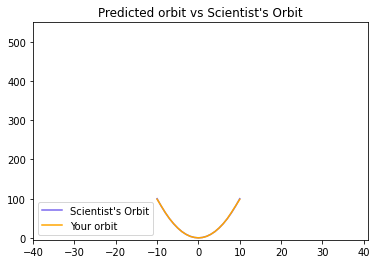

In [ ]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10,11))

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

3/3 [==============================] - 0s 4ms/step


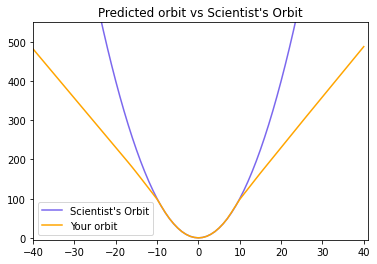

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


In [5]:
username = 'alipourmotlagh'
repository = 'DeepLearning'
#git_token = ''
#!git clone https://{git_token}@github.com/{username}/{repository}

fatal: destination path 'DeepLearning' already exists and is not an empty directory.


In [6]:
%cd {repository}

/content/drive/MyDrive/Github/DeepLearning


In [7]:
%ls -a

 banknotes.csv                        hourly_wages.csv
 best_banknote_model.hdf5             IntroDeeepLearning.ipynb
 darts.csv                            IntroductionToDeeplearninginPython.ipynb
 DeepLearningTensorflowBasics.ipynb   irrigation_machine.csv
'DeepLearning with Pytorch.ipynb'     MNIST/
 Digits/                              mnist.csv
 .git/                                shot_logs.csv.zip
 .gitignore                           titanic_all_numeric.csv


In [32]:
banknotes = pd.read_csv('banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,variace,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


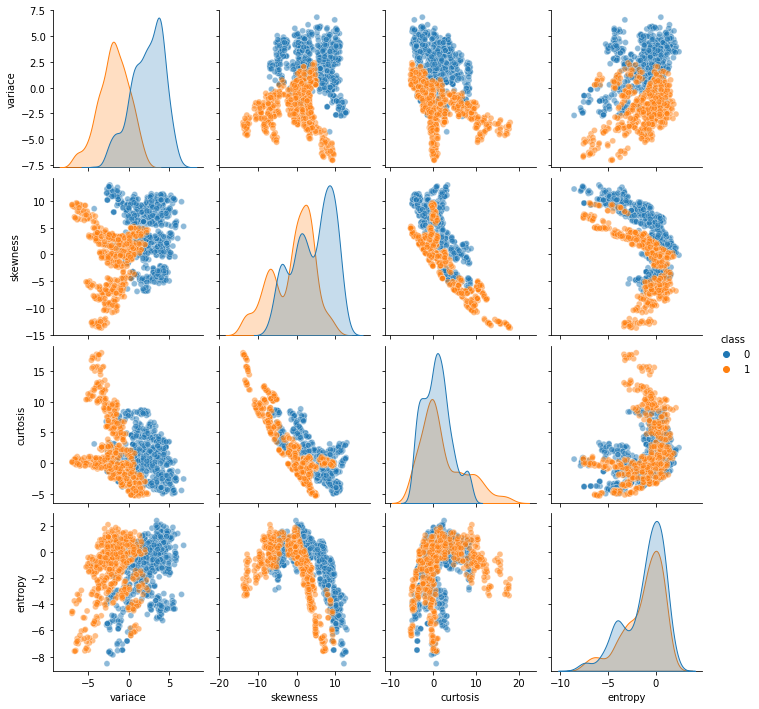

In [39]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class', plot_kws={'alpha':0.5}) 

# Show the plot
plt.show()



In [40]:
# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [41]:
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [43]:

X_train,X_test,y_train,y_test=train_test_split(banknotes[['variace','skewness','curtosis','entropy']]
                                               ,banknotes[['class']]
                                               , test_size=0.30, random_state=42)

In [45]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
30/30 [==============================] - 1s 5ms/step - loss: 0.2470 - accuracy: 0.9292
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9417
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9448
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9469
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9500
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1646 - accuracy: 0.9531
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9552
Epoch 8/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1531 - accuracy: 0.9563
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9563
Epoch 10/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9583
Epoch 11/20
30/30 [

In [9]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
darts = pd.read_csv('darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [16]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [17]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0
4,-0.051120,0.598946,2


In [18]:
# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [19]:
competitors

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [28]:
darts = pd.read_csv('darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [29]:
darts=pd.get_dummies(darts)
darts.head()

,xCoord,yCoord,competitor_Kate,competitor_Michael,competitor_Steve,competitor_Susan
0,0.196451,-0.520341,0,0,1,0
1,0.476027,-0.306763,0,0,0,1
2,0.003175,-0.980736,0,1,0,0
3,0.294078,0.267566,1,0,0,0
4,-0.051120,0.598946,0,0,1,0


In [36]:
darts.iloc[:,2:]

,competitor_Kate,competitor_Michael,competitor_Steve,competitor_Susan
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
795,1,0,0,0
796,0,0,1,0
797,0,1,0,0
798,0,1,0,0


In [55]:
coord_train,coords_small_test,competitors_train,competitors_small_test = train_test_split(darts.iloc[:,0:2],darts.iloc[:,2:]
                                                                           , test_size=0.05, random_state=42)
coord_train,coord_test,competitors_train,competitors_test = train_test_split(coord_train,competitors_train
                                                                           , test_size=0.30, random_state=42)

Softmax 
predictions
Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!



In [56]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8252
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8045
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8308
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8289
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8233
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8233
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8139
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8271
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8139
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8308
Epoch 11/

In [57]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,list(competitors_small_test.iloc[i,:])))

2/2 [==============================] - 0s 4ms/step
Raw Model Predictions                         | True labels
[0.29547927 0.01309807 0.68913627 0.0022864 ] | [0, 0, 1, 0]
[9.3002750e-10 9.9999994e-01 1.0467872e-17 5.1226992e-09] | [0, 1, 0, 0]
[0.97697926 0.01086286 0.01035417 0.00180374] | [1, 0, 0, 0]
[3.0649772e-03 2.8742997e-02 9.6796435e-01 2.2766553e-04] | [1, 0, 0, 0]
[0.46763718 0.00135427 0.5241083  0.00690024] | [0, 0, 0, 1]
[2.2888532e-01 4.3537965e-01 2.0054533e-05 3.3571500e-01] | [0, 0, 0, 1]
[6.4081256e-04 9.9934900e-01 3.1015948e-09 1.0183554e-05] | [0, 1, 0, 0]
[1.8302014e-10 9.9999994e-01 8.5756691e-16 5.0238252e-10] | [0, 1, 0, 0]
[4.1509080e-03 7.5375824e-04 6.6986318e-06 9.9508858e-01] | [0, 0, 0, 1]
[6.9974398e-05 9.9992436e-01 2.1351928e-15 5.6067961e-06] | [0, 1, 0, 0]
[0.06713936 0.00900448 0.02644427 0.89741194] | [0, 0, 0, 1]
[0.12993369 0.32050171 0.01297752 0.5365871 ] | [0, 0, 0, 1]
[0.22605954 0.000828   0.01938174 0.7537307 ] | [0, 0, 0, 1]
[0.06480265 

In [58]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,list(competitors_small_test.iloc[i,:])))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,list(competitors_small_test.iloc[i,:])))

2/2 [==============================] - 0s 10ms/step
Raw Model Predictions                         | True labels
[0.29547927 0.01309807 0.68913627 0.0022864 ] | [0, 0, 1, 0]
[9.3002750e-10 9.9999994e-01 1.0467872e-17 5.1226992e-09] | [0, 1, 0, 0]
[0.97697926 0.01086286 0.01035417 0.00180374] | [1, 0, 0, 0]
[3.0649772e-03 2.8742997e-02 9.6796435e-01 2.2766553e-04] | [1, 0, 0, 0]
[0.46763718 0.00135427 0.5241083  0.00690024] | [0, 0, 0, 1]
[2.2888532e-01 4.3537965e-01 2.0054533e-05 3.3571500e-01] | [0, 0, 0, 1]
[6.4081256e-04 9.9934900e-01 3.1015948e-09 1.0183554e-05] | [0, 1, 0, 0]
[1.8302014e-10 9.9999994e-01 8.5756691e-16 5.0238252e-10] | [0, 1, 0, 0]
[4.1509080e-03 7.5375824e-04 6.6986318e-06 9.9508858e-01] | [0, 0, 0, 1]
[6.9974398e-05 9.9992436e-01 2.1351928e-15 5.6067961e-06] | [0, 1, 0, 0]
[0.06713936 0.00900448 0.02644427 0.89741194] | [0, 0, 0, 1]
[0.12993369 0.32050171 0.01297752 0.5365871 ] | [0, 0, 0, 1]
[0.22605954 0.000828   0.01938174 0.7537307 ] | [0, 0, 0, 1]
[0.06480265

In [8]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64,input_shape=(20,),activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3,activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [13]:
irrigation_machine = pd.read_csv('irrigation_machine.csv')
irrigation_machine.drop('Unnamed: 0',axis=1,inplace=True)
irrigation_machine.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [15]:
irrigation_machine.iloc[:,20:]

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0
...,...,...,...
1995,0,0,0
1996,1,1,1
1997,1,0,0
1998,0,1,0


In [16]:
sensors_train,sensors_test,parcels_train,parcels_test = train_test_split(irrigation_machine.iloc[:,:20],irrigation_machine.iloc[:,20:],test_size=0.3,random_state=42)

In [19]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.5946 - val_loss: 0.2497 - val_accuracy: 0.5536
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.5857 - val_loss: 0.2486 - val_accuracy: 0.5643
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.5938 - val_loss: 0.2484 - val_accuracy: 0.5250
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.5634 - val_loss: 0.2421 - val_accuracy: 0.5643
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1176 - accuracy: 0.5920 - val_loss: 0.2498 - val_accuracy: 0.6071
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.5848 - val_loss: 0.2436 - val_accuracy: 0.5607
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.5813 - val_loss: 0.2426 - val_accuracy: 0.5750
Epoch 8/100
3

In [44]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [21]:
X_train,X_test,y_train,y_test = train_test_split(irrigation_machine.iloc[:,:20],irrigation_machine.iloc[:,20:],test_size=0.3,random_state=42)

In [25]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))



Epoch 1/25
44/44 [==============================] - 0s 6ms/step - loss: 0.0854 - accuracy: 0.5493 - val_loss: 0.3478 - val_accuracy: 0.6067
Epoch 2/25
44/44 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.5950 - val_loss: 0.3514 - val_accuracy: 0.5967
Epoch 3/25
44/44 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.5643 - val_loss: 0.3519 - val_accuracy: 0.5417
Epoch 4/25
44/44 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.5679 - val_loss: 0.3519 - val_accuracy: 0.5300
Epoch 5/25
44/44 [==============================] - 0s 4ms/step - loss: 0.0818 - accuracy: 0.5586 - val_loss: 0.3552 - val_accuracy: 0.5917
Epoch 6/25
44/44 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.5614 - val_loss: 0.3525 - val_accuracy: 0.5633
Epoch 7/25
44/44 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.5536 - val_loss: 0.3524 - val_accuracy: 0.5867
Epoch 8/25
44/44 [==

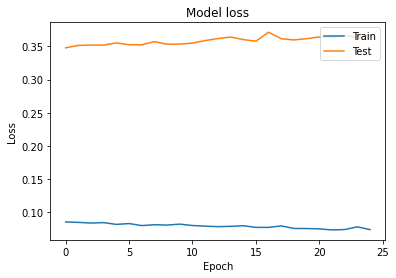

In [26]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])



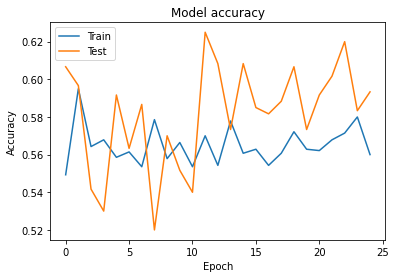

In [27]:
# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [28]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0723 - accuracy: 0.5600 - val_loss: 0.3655 - val_accuracy: 0.5850
Epoch 2/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0746 - accuracy: 0.5900 - val_loss: 0.3687 - val_accuracy: 0.5317
Epoch 3/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 0.5700 - val_loss: 0.3678 - val_accuracy: 0.5250
Epoch 4/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.5714 - val_loss: 0.3711 - val_accuracy: 0.5883
Epoch 5/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0718 - accuracy: 0.5614 - val_loss: 0.3713 - val_accuracy: 0.5533
Epoch 6/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0712 - accuracy: 0.5586 - val_loss: 0.3711 - val_accuracy: 0.5317
Epoch 7/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0698 - accuracy: 0.5821 - val_loss: 0.3717 - val_accuracy: 0.5717
Epoch 

In [31]:
banknotes = pd.read_csv('banknotes.csv')
X_train,X_test,y_train,y_test=train_test_split(banknotes[['variace','skewness','curtosis','entropy']]
                                               ,banknotes[['class']]
                                               , test_size=0.30, random_state=42)

In [32]:
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
30/30 [==============================] - 1s 11ms/step - loss: 0.6706 - accuracy: 0.7052 - val_loss: 0.5806 - val_accuracy: 0.7282
Epoch 2/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.7688 - val_loss: 0.4415 - val_accuracy: 0.7767
Epoch 3/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8115 - val_loss: 0.3594 - val_accuracy: 0.8155
Epoch 4/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.3109 - accuracy: 0.8417 - val_loss: 0.3076 - val_accuracy: 0.8301
Epoch 5/1000000000000
30/30 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.8740 - val_loss: 0.2721 - val_accuracy: 0.8689
Epoch 6/1000000000000
30/30 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.8990 - val_loss: 0.2467 - val_accuracy: 0.8908
Epoch 7/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.2184 - a

In [87]:
digits = np.load('./Digits/digits_pixels.npy')
target = np.load('./Digits/digits_target.npy')
type(digits)

numpy.ndarray

In [88]:

encoded_target = np.zeros((target.size, target.max()+1))
encoded_target[np.arange(target.size), target] = 1
encoded_target

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [89]:
#df = pd.DataFrame(digits)
 
#df['target']=pd.DataFrame(target)[[0]]
#df

In [90]:
X_train,X_test,y_train,y_test = train_test_split(digits,encoded_target,test_size=0.3,random_state=142)

In [91]:
y_test.shape

(540, 10)

In [105]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10,activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

40/40 [==============================] - 0s 2ms/step
[[2.4118081e-04 2.9991490e-01 1.4220301e-06 ... 1.9666354e-08
  1.6295044e-06 1.2768299e-04]
 [7.8101720e-10 2.5671024e-03 1.3878305e-05 ... 5.5577897e-07
  9.5390469e-06 1.3014783e-06]
 [5.0469154e-08 8.8253664e-03 2.7446817e-05 ... 2.6630974e-07
  2.6546662e-05 5.8621122e-06]
 ...
 [2.7847096e-07 4.4395941e-01 1.8084362e-06 ... 1.2109141e-08
  1.1465751e-03 8.6722651e-04]
 [1.3244471e-10 3.3865476e-01 2.5842221e-08 ... 4.8873986e-08
  1.3359407e-02 3.6602712e-03]
 [2.7393071e-10 4.8113703e-05 1.7142571e-10 ... 8.9103516e-09
  5.0763920e-06 3.9297916e-07]]


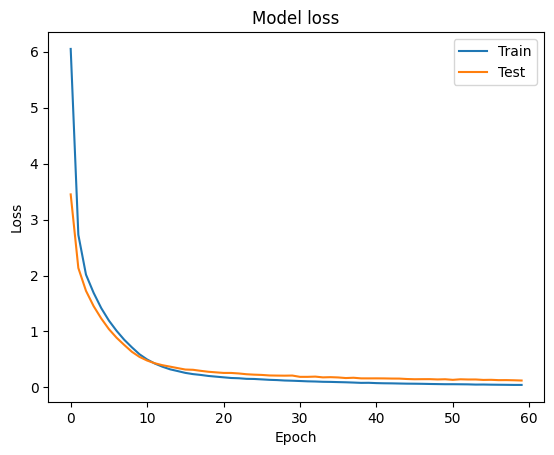

In [106]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

In [107]:
training_sizes = np.array([125,  502,  879, 1255])

In [108]:
initial_weights = model.get_weights()

In [109]:
train_accs=[]
test_accs= []
early_stop = EarlyStopping(monitor = 'loss', patience = 1)
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]
    
    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    


Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9920
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9920
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9920
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

In [110]:
train_accs

[1.0, 1.0, 0.9943116903305054, 0.9944223165512085]

In [111]:

test_accs

[0.9629629850387573,
 0.9648148417472839,
 0.9574074149131775,
 0.9574074149131775]

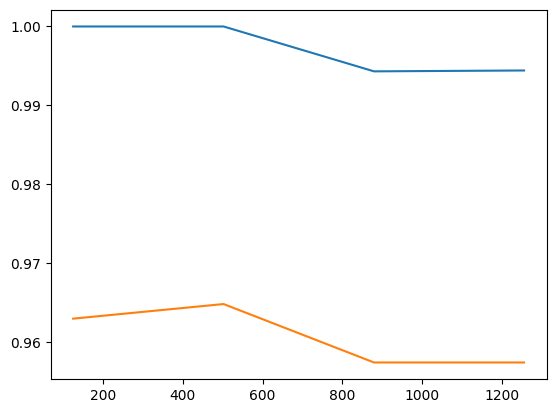

In [112]:
sns.lineplot(x=training_sizes,y=train_accs)
sns.lineplot(x=training_sizes,y=test_accs)
plt.show()